<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [1]:
import pandas as pd 
import numpy as np 

In [25]:
#To-Do: read the dataset 
data = pd.read_csv("dataset/HepatitisCdata.csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [1]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 

- We have 2 categorical attributes: Category and Sex
- In order to turn them into numerical values we have to see how many categories there are in each attribute, for that we'll use pandas.core.series.Series.unique() method

In [4]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [6]:
data.Sex.unique()

array(['m', 'f'], dtype=object)

The OrdinalEncoder in the scikit-learn library enables us to map each unique category to a numerical value

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
columns = ["Category","Sex"]
cat = data[columns]
encoder = OrdinalEncoder()

cat_trans = encoder.fit_transform(cat)
    
data[columns] = cat_trans
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0.0,32,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0.0,32,1.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0.0,32,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0.0,32,1.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0.0,32,1.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

#To-Do list all the columns that contain missing values along with their counts 

In [ ]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 

Let's see first the distribution of the attributes having missing values

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

d:\computer_vision_projects\Bootcamp\Unit2-Project\data_analytics\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\computer_vision_projects\Bootcamp\Unit2-Project\data_analytics\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\computer_vision_projects\Bootcamp\Unit2-Project\data_analytics\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

Text(0.5, 1.0, 'CHOL distribution')

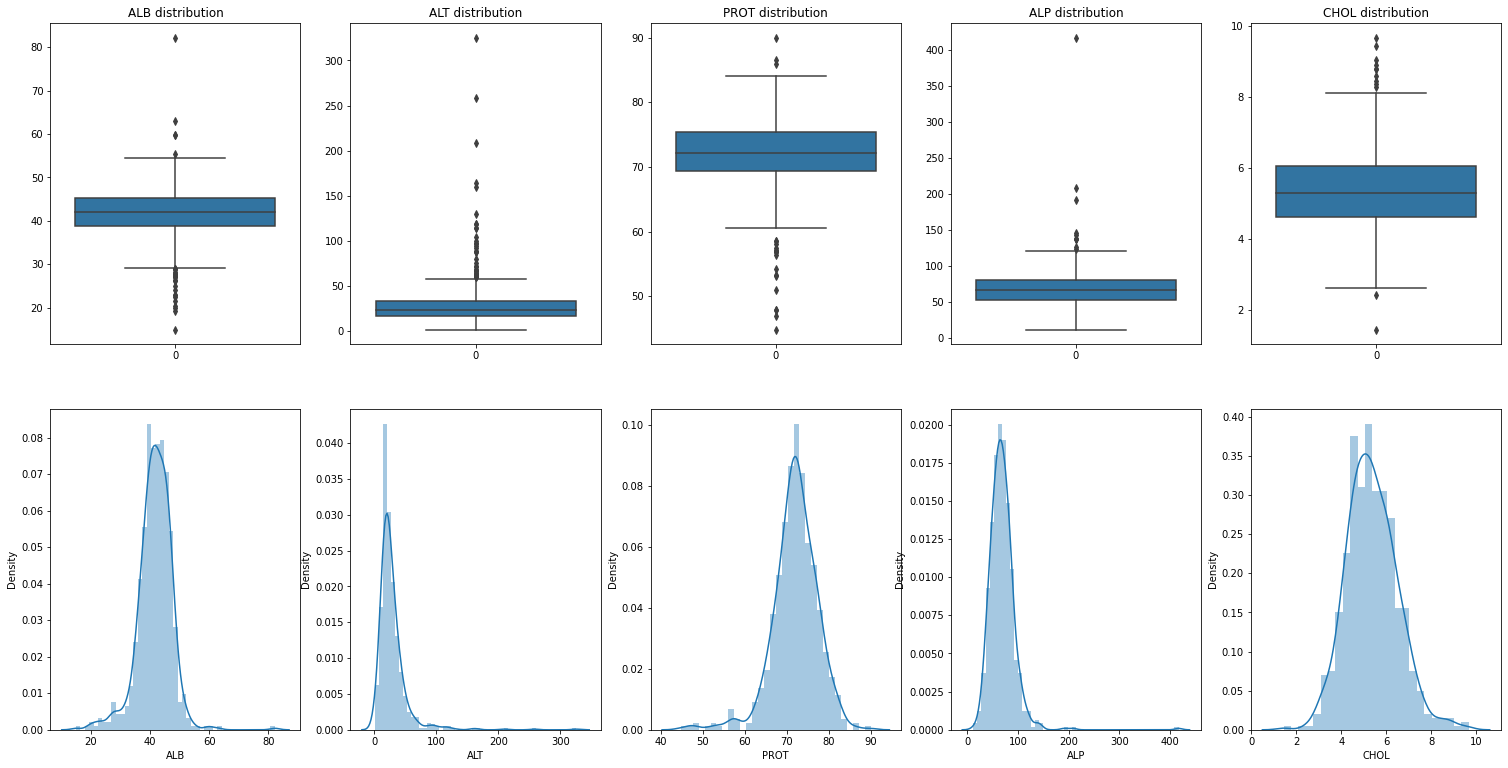

In [30]:
fig, axes = plt.subplots(2,5,figsize=(26,13))
sns.boxplot(ax= axes[0,0],data=data["ALB"])
axes[0,0].set_title("ALB BoxPlot")

sns.boxplot(ax= axes[0,1],data=data["ALT"])
axes[0,1].set_title("ALT BoxPlot")

sns.boxplot(ax= axes[0,2],data=data["PROT"])
axes[0,2].set_title("PROT BoxPlot")

sns.boxplot(ax= axes[0,3],data=data["ALP"])
axes[0,3].set_title("ALP BoxPlot")

sns.boxplot(ax= axes[0,4],data=data["CHOL"])
axes[0,4].set_title("CHOL BoxPlot")

sns.distplot(data["ALB"],ax= axes[1,0])
axes[0,0].set_title("ALB distribution")

sns.distplot(data["ALT"],ax= axes[1,1])
axes[0,1].set_title("ALT distribution")

sns.distplot(data["PROT"],ax= axes[1,2])
axes[0,2].set_title("PROT distribution")

sns.distplot(data["ALP"],ax= axes[1,3])
axes[0,3].set_title("ALP distribution")

sns.distplot(data["CHOL"],ax= axes[1,4])
axes[0,4].set_title("CHOL distribution")

Attributes : ALT,ALP are skewed and right tailed. PROT is also skewed and left tailed. The presence of outliers affects the mean value therefore we can't use it to replace na values. Therefore we can use either the mode or median value.

- ALT and PROT has only one missing value therefore filling using the mode won't bias the data
- ALP has 18 missing values which is 2% of the data, filling with the mode  may bias the model therefore we'll be using the median.

In [31]:
# Before filling na values
rows_with_na = data[["ALP","ALT","PROT"]].isna().any(axis=1)
data[rows_with_na]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
540,541,2.0,38,1.0,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,542,2.0,19,1.0,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,2.0,29,1.0,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,547,2.0,30,1.0,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,569,3.0,49,1.0,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,570,3.0,49,1.0,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,571,3.0,50,1.0,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,572,3.0,53,1.0,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,577,3.0,71,1.0,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,582,3.0,49,0.0,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0


In [38]:
data.ALT.mode()[0]

16.6

In [39]:
median_alp = data.ALP.median()
data[["ALP"]] = data[["ALP"]].fillna(value=median_alp)

mode_alt = data.ALT.mode()
data[["ALT"]] = data[["ALT"]].fillna(value=mode_alt[0])

mode_prot = data.PROT.mode()
data[["PROT"]] = data[["PROT"]].fillna(value=mode_prot[0])


print(f"ALP median : {median_alp}\nALT mode : {mode_alt}\nPROT mode : {mode_prot}")

ALP median : 66.2
ALT mode : 0    16.6
dtype: float64
PROT mode : 0    71.9
dtype: float64


In [40]:
# After filling na values
data[rows_with_na]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
540,541,2.0,38,1.0,45.0,56.3,16.6,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,542,2.0,19,1.0,41.0,66.2,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,2.0,29,1.0,49.0,66.2,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,547,2.0,30,1.0,45.0,66.2,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,569,3.0,49,1.0,39.0,66.2,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,570,3.0,49,1.0,46.0,66.2,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,571,3.0,50,1.0,42.0,66.2,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,572,3.0,53,1.0,46.0,66.2,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,577,3.0,71,1.0,37.0,66.2,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,582,3.0,49,0.0,39.0,66.2,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0


Attribute ALB, CHOL are symmetric, therefore despite having outliers we can use the mean to fill the data

In [41]:
na_rows = data[["ALB","CHOL"]].isna().any(axis=1)
data[na_rows]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0.0,43,1.0,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,320,0.0,32,0.0,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,330,0.0,33,0.0,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,414,0.0,46,0.0,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,425,0.0,48,0.0,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,434,0.0,48,0.0,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,499,0.0,57,0.0,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
584,585,3.0,75,0.0,36.0,66.2,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
590,591,4.0,46,1.0,20.0,66.2,62.0,113.0,254.0,1.48,NaN,114.0,138.0,71.9
603,604,4.0,65,1.0,NaN,66.2,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


In [44]:
mean_alb = data.ALB.mean()
data[["ALB"]] = data[["ALB"]].fillna(value=mean_alb)

mean_chol = data.CHOL.mean()
data[["CHOL"]] = data[["CHOL"]].fillna(value=mean_chol)

print(f"ALB mean : {mean_alb}\nCHOL mean : {mean_chol}")

ALB mean : 41.620195439739405
CHOL mean : 5.368099173553719


In [45]:
# Dataframe after filling the na values
data[na_rows]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0.0,43,1.0,48.600000,45.0,10.5,40.5,5.3,7.09,5.368099,63.0,25.1,70.0
319,320,0.0,32,0.0,47.400000,52.5,19.1,17.1,4.6,10.19,5.368099,63.0,23.0,72.2
329,330,0.0,33,0.0,42.400000,137.2,14.2,13.1,3.4,8.23,5.368099,48.0,25.7,74.4
413,414,0.0,46,0.0,42.900000,55.1,15.2,29.8,3.6,8.37,5.368099,61.0,29.0,71.9
424,425,0.0,48,0.0,45.600000,107.2,24.4,39.0,13.8,9.77,5.368099,88.0,38.0,75.1
433,434,0.0,48,0.0,46.800000,93.3,10.0,23.2,4.3,12.41,5.368099,52.0,23.9,72.4
498,499,0.0,57,0.0,48.400000,94.4,2.5,39.6,2.3,8.84,5.368099,82.0,6.4,76.8
584,585,3.0,75,0.0,36.000000,66.2,114.0,125.0,14.0,6.65,5.368099,57.0,177.0,72.0
590,591,4.0,46,1.0,20.000000,66.2,62.0,113.0,254.0,1.48,5.368099,114.0,138.0,71.9
603,604,4.0,65,1.0,41.620195,66.2,40.0,54.0,13.0,7.50,5.368099,70.0,107.0,79.0


> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [46]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [47]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [48]:
data.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

### 6. Save the clean dataset :

In [49]:
# Don't forget to drop the index 
data.to_csv('outputs/clean.csv', index=False)  